In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(42)

COMPRESOR C

In [2]:
c = pd.read_csv('../Datos/Originales/Compresores/CompC.csv')
c.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida,Potencia_Estimada
0,0.758687,12.7,0.000000,65.908308,68.126155
1,0.756574,12.7,0.000000,66.551797,68.298419
2,0.750645,13.1,0.000000,67.988530,68.616773
3,0.745357,13.1,0.532897,68.881566,69.557090
4,0.743977,13.5,4.425237,72.657725,73.223346


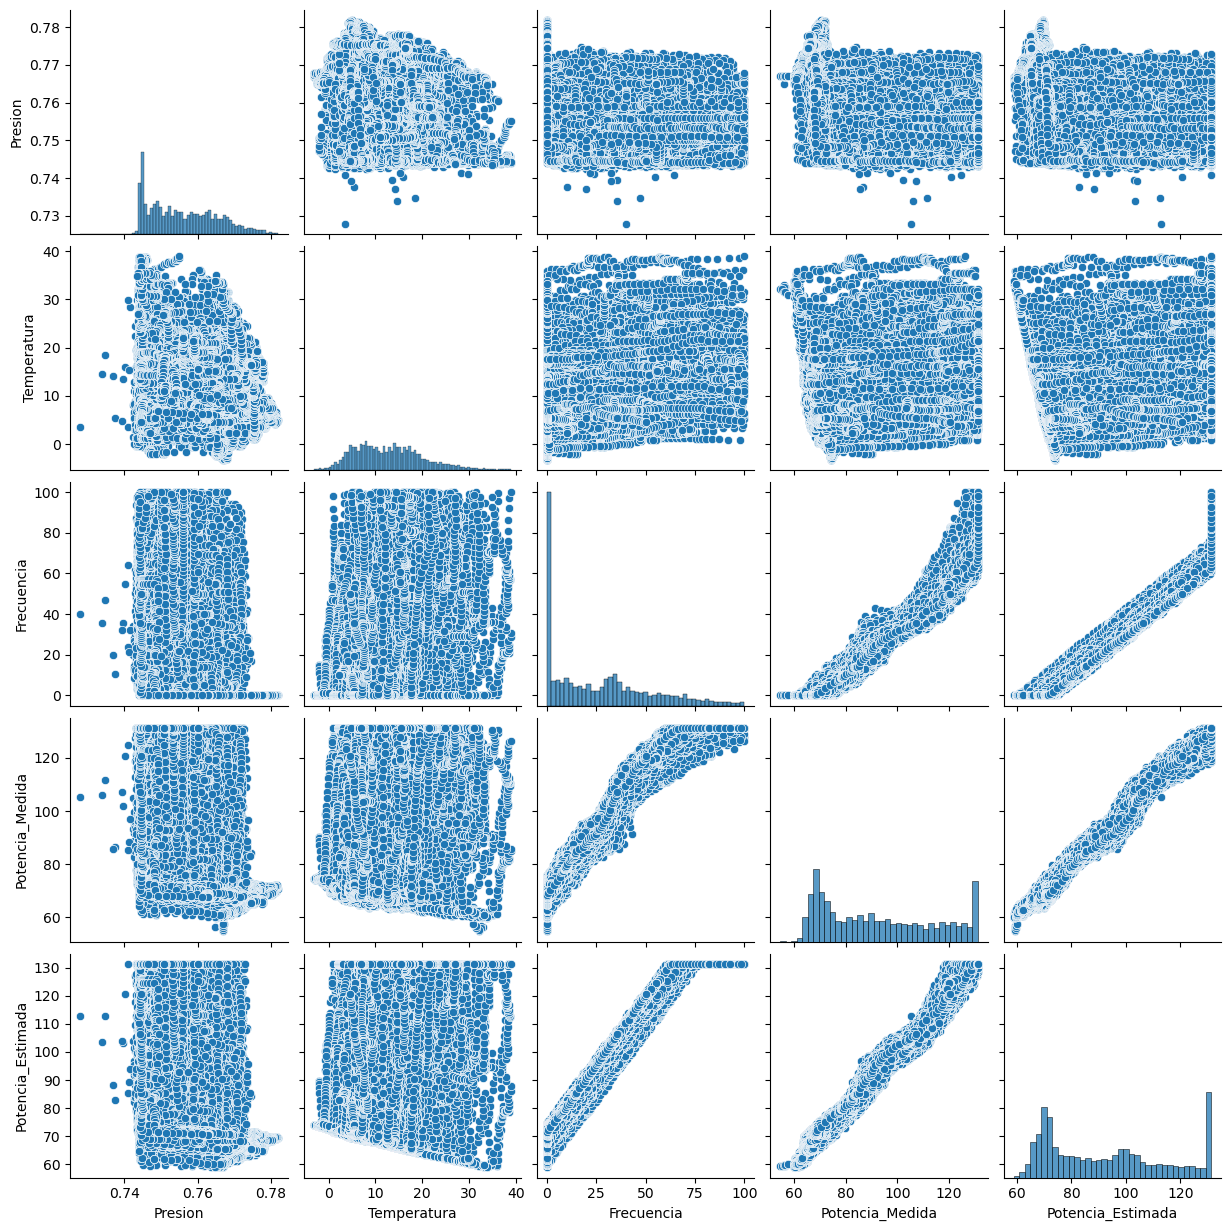

In [3]:
sns.pairplot(c)

<Axes: >

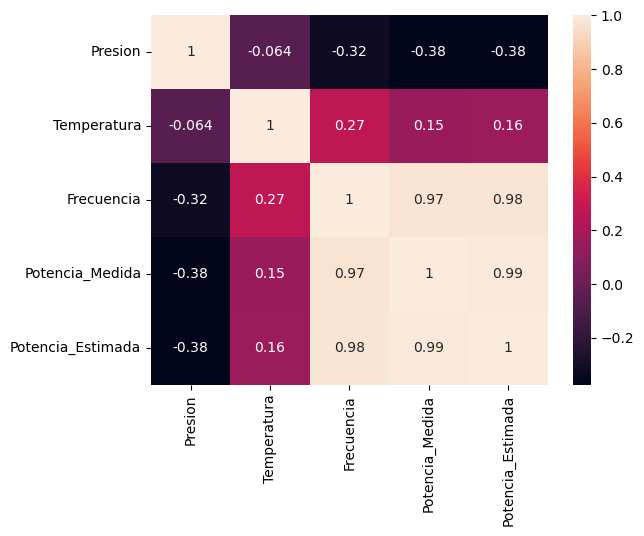

In [4]:
import seaborn as sns
sns.heatmap(c.corr(), annot=True)

In [5]:
c.shape

(49705, 5)

In [6]:
from sklearn.model_selection import train_test_split

Xa = c.drop(['Potencia_Medida', 'Potencia_Estimada'], axis=1)
ya = c['Potencia_Medida']

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, train_size=0.65, random_state=42)

print(Xa_train.shape, Xa_test.shape)
print(ya_train.shape,  ya_test.shape)

(32308, 3) (17397, 3)
(32308,) (17397,)


In [7]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import cross_val_score,cross_validate, GridSearchCV

In [8]:
models=[LinearRegression(),Lasso(max_iter=1000),Ridge(max_iter=1000),ElasticNet(max_iter=1000),TweedieRegressor(max_iter=10000)]

for model in models:
    cv_score=cross_validate(model,Xa,ya,scoring=['neg_mean_absolute_error','r2'],cv=5)
    
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model LinearRegression() = -3.2692555393481983
R2 for model LinearRegression() = 0.9543448643504471
MAE for model Lasso() = -3.446110894151432
R2 for model Lasso() = 0.9507316855142696
MAE for model Ridge(max_iter=1000) = -3.2585305129754354
R2 for model Ridge(max_iter=1000) = 0.9542348171431643
MAE for model ElasticNet() = -3.441674306982075
R2 for model ElasticNet() = 0.9507869551171932
MAE for model TweedieRegressor(max_iter=10000) = -3.438011228286966
R2 for model TweedieRegressor(max_iter=10000) = 0.9508291136585753


In [9]:
model_hyperparameters = {
    'lin_reg':{
      
    },
    'lasso_reg':{
        'alpha':[0.5,1,5,10,20]        
    },
    'ridge_reg':{
        'alpha':[0.5,1,5,10,20]        
    },
    'elastic_reg':{
        'alpha':[0.5,1,5,10,20],
        'l1_ratio':[0.1,0.3,0.5,0.7,0.9]        
    },
    'tweedie_reg':{
        'power':[0,1,2,3],
        'alpha':[0, 0.5, 1, 5, 10, 20],    
        'link':['log','identity']    
    }
}

In [10]:
model_keys=list(model_hyperparameters.keys())

In [11]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['r2'],refit='r2')

    regressor.fit(Xa,ya)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

pd.DataFrame(result)

,model_used,highest_score,best hyperparameters
0,LinearRegression(),0.954345,{}
1,Lasso(),0.950799,{'alpha': 0.5}
2,Ridge(max_iter=1000),0.954345,{'alpha': 0.5}
3,ElasticNet(),0.950830,"{'alpha': 0.5, 'l1_ratio': 0.1}"
4,TweedieRegressor(max_iter=10000),0.954345,"{'alpha': 0, 'link': 'identity', 'power': 0}"


LINEAL

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, lr.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, lr.predict(Xa_train)))

print("Test RSE: ", mean_squared_error(ya_test, lr.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, lr.predict(Xa_test)))

n_scores = cross_val_score(lr, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  4.428929464273963
Train R2:  0.9582068070775563
Test RSE:  20.498371737280827
Test R2:  0.9570034717704701
R2: 0.954 (0.008)


In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, max_iter=1000)
ridge.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, ridge.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, ridge.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, ridge.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, ridge.predict(Xa_test)))

n_scores = cross_val_score(ridge, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  4.446442861218922
Train R2:  0.9578756263953718
Test RMSE:  4.541398536081005
Test R2:  0.9567393285155181
R2: 0.954 (0.008)


In [14]:
from sklearn.linear_model import TweedieRegressor

tweedie = TweedieRegressor(alpha= 0, link= 'identity', power= 0)
tweedie.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, tweedie.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, tweedie.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, tweedie.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, tweedie.predict(Xa_test)))

n_scores = cross_val_score(tweedie, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  4.428929464291819
Train R2:  0.9582068070772193
Test RMSE:  4.52751286248197
Test R2:  0.957003469709286
R2: 0.954 (0.008)


KERNEL

In [15]:
from sklearn.svm import SVR

svr = SVR(kernel= 'rbf')
svr.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, svr.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, svr.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, svr.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, svr.predict(Xa_test)))

n_scores = cross_val_score(svr, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  2.2210747212330513
Train R2:  0.9894892341128291
Test RMSE:  2.1940242355440223
Test R2:  0.9899028951504627
R2: 0.987 (0.003)


ARBOLES

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [17]:
models=[DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
    cv_score=cross_validate(model,Xa,ya,scoring=['neg_mean_absolute_error','r2'],cv=5)
    
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model DecisionTreeRegressor() = -2.334019361095202
R2 for model DecisionTreeRegressor() = 0.9793024484138895
MAE for model RandomForestRegressor() = -1.965312092750623
R2 for model RandomForestRegressor() = 0.9858448599497758


In [18]:
model_hyperparameters = {
    'decision_tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'random_forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 5, 12],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}

In [19]:
model_keys=list(model_hyperparameters.keys())

In [20]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['r2'],refit='r2')

    regressor.fit(Xa,ya)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

pd.DataFrame(result)

,model_used,highest_score,best hyperparameters
0,DecisionTreeRegressor(),0.985233,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
1,RandomForestRegressor(),0.986722,"{'max_depth': 12, 'min_samples_leaf': 1, 'min_..."


In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)
dt.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, dt.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, dt.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, dt.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, dt.predict(Xa_test)))

n_scores = cross_val_score(dt, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.711794043674066
Train R2:  0.9937567453967874
Test RMSE:  1.9665071133819871
Test R2:  0.9918884272354249
R2: 0.985 (0.003)


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth= 12, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50)
rf.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, rf.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, rf.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, rf.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, rf.predict(Xa_test)))

n_scores = cross_val_score(rf, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.3170040405253218
Train R2:  0.9963044231406328
Test RMSE:  1.7277239522397436
Test R2:  0.9937387256569983
R2: 0.987 (0.003)


BOOSTING

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [24]:
models=[GradientBoostingRegressor(), XGBRegressor()]

for model in models:
    cv_score=cross_validate(model,Xa,ya,scoring=['neg_mean_absolute_error','r2'],cv=5)
    
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model GradientBoostingRegressor() = -1.85676939626542
R2 for model GradientBoostingRegressor() = 0.9875678487747249
MAE for model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) = -1.9320130780081382
R2 for model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsamp

In [25]:
model_hyperparameters = {
    'gradient_boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'xgboost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 1.0]
    }
}

In [26]:
model_keys=list(model_hyperparameters.keys())

In [27]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['r2'],refit='r2')

    regressor.fit(Xa,ya)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

pd.DataFrame(result)

,model_used,highest_score,best hyperparameters
0,GradientBoostingRegressor(),0.987820,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,"XGBRegressor(base_score=None, booster=None, ca...",0.987716,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 100)
gb.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, gb.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, gb.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, gb.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, gb.predict(Xa_test)))

n_scores = cross_val_score(gb, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.9677723590614584
Train R2:  0.9917499280533123
Test RMSE:  1.9914320030128292
Test R2:  0.9916815006086348
R2: 0.988 (0.003)


In [29]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 1.0)
xgb.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, xgb.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, xgb.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, xgb.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, xgb.predict(Xa_test)))

n_scores = cross_val_score(xgb, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.9804292580978173
Train R2:  0.9916434562371687
Test RMSE:  1.9952836326138446
Test R2:  0.9916492918638533
R2: 0.988 (0.003)


STACKING

In [30]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('rf', RandomForestRegressor(max_depth= 12, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50)),
    ('svr', SVR(kernel='rbf')),
    ('XGBoost', XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 1.0)),
    ('ridge', Ridge(alpha=1, max_iter=1000))
]

stacking_model_c = StackingRegressor(
    estimators=estimators,
    final_estimator= LinearRegression(),
    cv=5
)

stacking_model_c.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, stacking_model_c.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, stacking_model_c.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, stacking_model_c.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, stacking_model_c.predict(Xa_test)))

n_scores = cross_val_score(stacking_model_c, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.3332493792571336
Train R2:  0.9962126904358402
Test RMSE:  1.7312412285510907
Test R2:  0.9937132064777564
R2: 0.988 (0.003)


XGBOOST

In [31]:
import joblib
joblib.dump(xgb, 'modelo_c.pkl')

['modelo_c.pkl']